In [1]:
### Tutorial Overview
## 1. Regression dataset
## 2. Numerical Feature Selection
## 3. Modeling with Selected Feautures
## 4. Tune the number of selected Features

In [2]:
###Generating Regression dataset unsing make_regression 

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

D:\Anaconda_Distribution\envs\newEnv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
X , y = make_regression(n_samples=1000,n_features=100,n_informative=10,noise=0.1,random_state=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=1)

print(" Training size:", X_train.shape,y_train.shape)
print(" Testing size:", X_test.shape,y_test.shape)

 Training size: (670, 100) (670,)
 Testing size: (330, 100) (330,)


### Numerical Feature Selection

#### Correlation Feature Selection

Features 0 :0.009419
Features 1 :1.018881
Features 2 :1.205187
Features 3 :0.000138
Features 4 :0.167511
Features 5 :5.985083
Features 6 :0.062405
Features 7 :1.455257
Features 8 :0.420384
Features 9 :101.392225
Features 10 :0.387091
Features 11 :1.581124
Features 12 :3.014463
Features 13 :0.232705
Features 14 :0.076281
Features 15 :4.299652
Features 16 :1.497530
Features 17 :0.261242
Features 18 :5.960005
Features 19 :0.523219
Features 20 :0.003365
Features 21 :0.024178
Features 22 :0.220958
Features 23 :0.576770
Features 24 :0.627198
Features 25 :0.350687
Features 26 :0.281877
Features 27 :0.584210
Features 28 :52.196337
Features 29 :0.046855
Features 30 :0.147323
Features 31 :0.368485
Features 32 :0.077631
Features 33 :0.698140
Features 34 :45.744046
Features 35 :2.047376
Features 36 :0.786270
Features 37 :0.996190
Features 38 :2.733533
Features 39 :63.957656
Features 40 :231.885540
Features 41 :1.372448
Features 42 :0.581860
Features 43 :1.072930
Features 44 :1.066976
Features 45 :

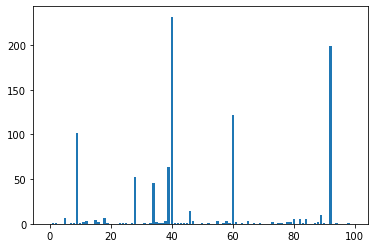

In [7]:
# Correlation is a measure of how two variables change together. Perhaps the most common Correlation measure is 
# Pearson's Correlation that assumes a Gaussian distribution to each Variable
# f_regression

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt


def select_features(X_train,X_test,y_train):
    
    fs = SelectKBest(score_func=f_regression, k='all')
    
    fs.fit(X_train,y_train)
    
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs,X_test_fs,fs

X_train_fs,X_test_fs,fs = select_features(X_train,X_test,y_train)

for i in range(len(fs.scores_)):
    print("Features %d :%f"%(i,fs.scores_[i]))

# plot the scores
plt.bar([i for i in range(len(fs.scores_))],fs.scores_)
plt.show()

#### Mutual Information Feature Selection

Features 0 :0.045484
Features 1 :0.000000
Features 2 :0.000000
Features 3 :0.000000
Features 4 :0.024816
Features 5 :0.000000
Features 6 :0.022659
Features 7 :0.000000
Features 8 :0.000000
Features 9 :0.074320
Features 10 :0.000000
Features 11 :0.000000
Features 12 :0.000000
Features 13 :0.000000
Features 14 :0.020390
Features 15 :0.004307
Features 16 :0.000000
Features 17 :0.000000
Features 18 :0.016566
Features 19 :0.003688
Features 20 :0.007579
Features 21 :0.018640
Features 22 :0.025206
Features 23 :0.017967
Features 24 :0.069173
Features 25 :0.000000
Features 26 :0.022232
Features 27 :0.000000
Features 28 :0.007849
Features 29 :0.012849
Features 30 :0.017402
Features 31 :0.008083
Features 32 :0.047321
Features 33 :0.002829
Features 34 :0.028968
Features 35 :0.000000
Features 36 :0.071652
Features 37 :0.027969
Features 38 :0.000000
Features 39 :0.064796
Features 40 :0.137695
Features 41 :0.008732
Features 42 :0.003983
Features 43 :0.000000
Features 44 :0.009387
Features 45 :0.00000

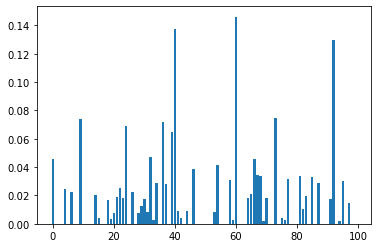

In [8]:
### mutual_info_regression

from sklearn.feature_selection import mutual_info_regression

def select_features(X_train,X_test,y_train):
    
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    
    fs.fit(X_train,y_train)
    
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs,X_test_fs,fs

X_train_fs,X_test_fs,fs = select_features(X_train,X_test,y_train)

for i in range(len(fs.scores_)):
    print("Features %d :%f"%(i,fs.scores_[i]))

# plot the scores
plt.bar([i for i in range(len(fs.scores_))],fs.scores_)
plt.show()

### Model with Selected Features

#### Model built with all features

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()

model.fit(X_train,y_train)

y_hat = model.predict(X_test)

mae = mean_absolute_error(y_test,y_hat)

print("Mean Abs Error is :%f"%(mae))

Mean Abs Error is :0.085692


#### Model built using Correlation Coefficient feature select

In [13]:
X , y = make_regression(n_samples=1000,n_features=100,n_informative=10,noise=0.1,random_state=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=1)

print(" Training size:", X_train.shape,y_train.shape)
print(" Testing size:", X_test.shape,y_test.shape)


def select_features(X_train,y_train,X_test,n_features):
    fs = SelectKBest(score_func=f_regression,k=n_features)
    fs.fit(X_train,y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs,X_test_fs,fs


X_train_fs,X_test_fs,fs = select_features(X_train,y_train,X_test,88)

model = LinearRegression()

model.fit(X_train_fs,y_train)

y_hat = model.predict(X_test_fs)

mae = mean_absolute_error(y_test,y_hat)

print('MAE : %.3f'%(mae))

 Training size: (670, 100) (670,)
 Testing size: (330, 100) (330,)
MAE : 0.085


####  Model built using mutual information

In [14]:
X , y = make_regression(n_samples=1000,n_features=100,n_informative=10,noise=0.1,random_state=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=1)

print(" Training size:", X_train.shape,y_train.shape)
print(" Testing size:", X_test.shape,y_test.shape)


def select_features(X_train,y_train,X_test,n_features):
    fs = SelectKBest(score_func=mutual_info_regression,k=n_features)
    fs.fit(X_train,y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs,X_test_fs,fs


X_train_fs,X_test_fs,fs = select_features(X_train,y_train,X_test,88)

model = LinearRegression()

model.fit(X_train_fs,y_train)

y_hat = model.predict(X_test_fs)

mae = mean_absolute_error(y_test,y_hat)

print('MAE : %.3f'%(mae))

 Training size: (670, 100) (670,)
 Testing size: (330, 100) (330,)
MAE : 0.084


###  Tune the number of selected features

In [18]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

X , y = make_regression(n_samples=1000,n_features=100,n_informative=10,noise=0.1,random_state=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=1)

print(" Training size:", X_train.shape,y_train.shape)
print(" Testing size:", X_test.shape,y_test.shape)

fs = SelectKBest(score_func=mutual_info_regression)

lr = LinearRegression()

pipeline = Pipeline(steps = [('ks',fs),('lrs',lr)])

grid = {}

grid['ks__k'] = [i for i in range(X_train.shape[1]-80,X_train.shape[1]+1)]

cv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)

search = GridSearchCV(pipeline,grid,cv=cv,scoring="neg_mean_absolute_error",n_jobs=-1)

#Performa the search
results = search.fit(X,y)

#Summary

print("Best MAE : %.3f" % results.best_score_)
print("Best params : %s" % results.best_params_)

#Summarize all

means = results.cv_results_["mean_test_score"]
params = results.cv_results_['params']

for mean,param in zip(means,params):
    print('>%.3f with: %r'%(mean,param))



 Training size: (670, 100) (670,)
 Testing size: (330, 100) (330,)


KeyboardInterrupt: 